In this project, we are going to attempt to classify fraudulent transactions. The goal is to prioritize finding fraud rather than labeling non-fraudulent transactions

Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
credit_data = pd.read_csv("creditcard.csv")
credit_data.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [6]:
credit_data.shape

(284807, 31)

#### Column Info:

Time: time elapsed between each transaction and the first transaction in the dataset (seconds)

Amount: transaction amount

Class: takes value 1 for fraud and value 0 for non-fraud (target variable)

V1-V28: principle components obtained with PCA, confidential transaction information (input variables)

Note: data is unbalanced, positive class (fraud) accounts for 0.172% of all transactions. Recommend using Area Under the Precision-Recall Curve (AUPRC) for measuring accuracy for the model. Precision-Recall is a useful metric when classes are very imbalanced. 

## Preprocessing

In [7]:
# check for missing values
credit_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Appears there are no missing values in the data

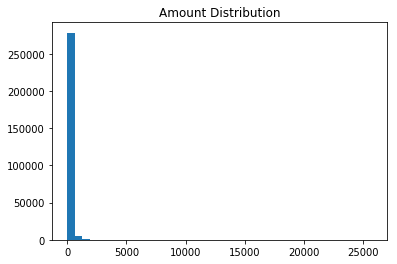

In [8]:
# check data distribution
plt.hist(credit_data.loc[:,"Amount"],bins=40)
plt.title("Amount Distribution")
plt.show()

Most data in V1-V28 appear normally distributed. Values in Amount column appear to be less normally distributed

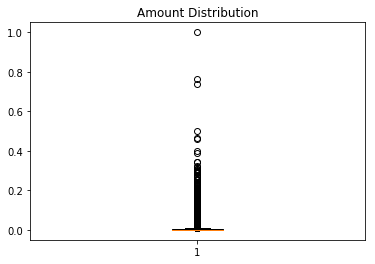

In [9]:
# check for outliers
amount = credit_data.loc[:,"Amount"]
# normalize data in amount
df_x = (amount-amount.min())/(amount.max()-amount.min())
plt.boxplot(df_x,patch_artist=True)
plt.title("Amount Distribution")
plt.show()

## Classification Supervised Model

For this analysis, we are going to use columns V1 to Amount as our input variables. The target will be the class column that indicates fraud and non-fraud transactions.

In [10]:
X = credit_data.iloc[:,1:30]
y = credit_data.loc[:,"Class"]

In [11]:
X.head(3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


In [12]:
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

### Naive Bayes

Basic classification technique that runs probabilities between independent features and categorical outcome, then picks y-value/category (fraud or non-fraud) that is most likely to have given the observed set of independent variables.

In [14]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,y_train)
ypred_NB = gnb.predict(X_test)

In [15]:
from sklearn.metrics import average_precision_score

avg_prec_NB = average_precision_score(y_test,ypred_NB)
print("Average precision-recall score:",avg_prec_NB)

Average precision-recall score: 0.049197828320818454


Not a very good score. Most likely due to data not being normally distributed.

### K-Nearest Neighbor

Look for datapoints that are most similar to the y-target variable.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train,y_train)
ypred_knn = knn.predict(X_test)

In [17]:
avg_prec_knn = average_precision_score(y_test,ypred_knn)
print("Average precision-recall score:",avg_prec_knn)

Average precision-recall score: 0.5829864401392468


### Logistic Regression

Useful for binary dependent variable problems. Utilizes a logistic function to make classifications. 

In [18]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,y_train)
ypred_logreg = logreg.predict(X_test)

In [19]:
avg_prec_logreg = average_precision_score(y_test,ypred_logreg)
print("Average precision-recall score:",avg_prec_logreg)

Average precision-recall score: 0.4930450259687295


## Random Forest

Ensemble model of multiple decision trees. Produces a very accurate classification model, but prone to overfitting.

In [20]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
ypred_rfc = rfc.predict(X_test)

In [21]:
avg_prec_rfc = average_precision_score(y_test,ypred_rfc)
print("Average precision-recall score:",avg_prec_rfc)

Average precision-recall score: 0.756011549447775


## XGBoost

In [22]:
from xgboost import XGBClassifier

xgc = XGBClassifier()
xgc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [23]:
ypred_xgc = xgc.predict(X_test)

/home/glenn/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [24]:
avg_prec_xgc = average_precision_score(y_test,ypred_xgc)
print("Average precision-recall score:",avg_prec_xgc)

Average precision-recall score: 0.7596895169890444


Decided to not use Support Vector Machine because this dataset was large. SVMs are best used for smaller datasets, otherwise the model becomes increasingly more inefficient. 